In [1]:
import numpy as np, pandas as pd

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
file_path = "C:/Users/Thomas/Documents/GitHub/Bt22xFtc555-1/PHENOTYPE/L-DOPA-measurement1.csv"

In [3]:
New_segs = pd.read_csv(file_path)

New_segs.columns = [c.capitalize() for c in New_segs.columns]

New_segs = New_segs.loc[:, ~New_segs.columns.str.startswith('Unnamed')]

New_segs["Replicate"] = New_segs.groupby(['Strain']).cumcount()+1

New_segs.head()

,Plate,Row,Column,Strain,Segregant,Mean,Mode,Min,Max,Replicate
0,BF plate 1a,b,2,PMY2556,segregant,1307.8,1374.0,121.0,3973.0,1
1,BF plate 1a,b,3,PMY2564,segregant,339.1,0.0,0.0,4423.0,1
2,BF plate 1a,b,4,PMY2572,segregant,22833.3,22603.0,20026.0,37388.0,1
3,BF plate 1a,b,5,PMY2565,segregant,5337.9,2777.0,2549.0,29578.0,1
4,BF plate 1a,b,6,PMY2573,segregant,11831.0,10863.0,8731.0,16378.0,1


In [4]:
New_segs.Replicate.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int64)

In [5]:
New_segs[New_segs.Strain == "PMY2556"]

,Plate,Row,Column,Strain,Segregant,Mean,Mode,Min,Max,Replicate
0,BF plate 1a,b,2,PMY2556,segregant,1307.8,1374.0,121.0,3973.0,1
77,BF plate 1b,c,9,PMY2556,segregant,1141.3,1548.0,397.0,3172.0,2
142,BF plate 1c,d,4,PMY2556,segregant,401.1,0.0,0.0,6914.0,3


In [6]:
New_segs.dropna(axis = 1, inplace =True, how = "all") #filtered out all issues verified by removal of the column based on it being entirely NA

New_segs.head()

,Plate,Row,Column,Strain,Segregant,Mean,Mode,Min,Max,Replicate
0,BF plate 1a,b,2,PMY2556,segregant,1307.8,1374.0,121.0,3973.0,1
1,BF plate 1a,b,3,PMY2564,segregant,339.1,0.0,0.0,4423.0,1
2,BF plate 1a,b,4,PMY2572,segregant,22833.3,22603.0,20026.0,37388.0,1
3,BF plate 1a,b,5,PMY2565,segregant,5337.9,2777.0,2549.0,29578.0,1
4,BF plate 1a,b,6,PMY2573,segregant,11831.0,10863.0,8731.0,16378.0,1


In [7]:
## Load genotype data
genotype_path = 'C:/Users/Thomas/Documents/GitHub/Bt22xFtc555-1/GENOTYPE/Bt22xFtc555-1_genotypes.csv.gz'
gv = pd.read_csv(genotype_path)
gv.head()

,Unnamed: 0,Pos,Alleles,Type,Chrom,PMY2936,PMY2934,PMY2932,PMY2931,PMY2929,...,PMY2561,PMY2782,PMY2783,PMY2784,PMY2661,PMY2926,PMY2807,PMY2808,PMY2810,PMY2902
0,5,25980,C.T,snp,1,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,7,26119,ATT.GTT,snp,1,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,12,26587,ACCTT.TCCAT.TCCTT.GCCTT,complex,1,2.0,2.0,1.0,2.0,2.0,...,1.0,1.0,1,1.0,1.0,2.0,1.0,2.0,1.0,2.0
3,15,27290,TCCC.CCCC,snp,1,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,17,28274,GCGCT.ACGCT,snp,1,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [8]:
New_segs_fil = New_segs[(New_segs.Strain.isin(gv.columns))]

New_segs_fil.reset_index(drop = True)

,Plate,Row,Column,Strain,Segregant,Mean,Mode,Min,Max,Replicate
0,BF plate 1a,b,2,PMY2556,segregant,1307.8,1374.0,121.0,3973.0,1
1,BF plate 1a,b,3,PMY2564,segregant,339.1,0.0,0.0,4423.0,1
2,BF plate 1a,b,4,PMY2572,segregant,22833.3,22603.0,20026.0,37388.0,1
3,BF plate 1a,b,5,PMY2565,segregant,5337.9,2777.0,2549.0,29578.0,1
4,BF plate 1a,b,6,PMY2573,segregant,11831.0,10863.0,8731.0,16378.0,1
...,...,...,...,...,...,...,...,...,...,...
982,BF plate 6c,g,6,PMY2650,Ftc555-1,1594.4,580.0,109.0,5498.0,35
983,BF plate 6c,g,7,PMY2935,segregant,6585.4,5015.0,3910.0,8958.0,3
984,BF plate 6c,g,9,PMY2650,Ftc555-1,1900.1,458.0,0.0,18986.0,36
985,BF plate 6c,g,10,PMY2896,segregant,7014.9,4825.0,4825.0,10027.0,3


In [9]:
New_segs_fil.shape

(987, 10)

In [10]:
New_segs.shape

(1080, 10)

In [11]:
miss_segs = [s for s in New_segs_fil.Strain.unique() if s not in gv.columns]

len(miss_segs), miss_segs[:3]

(0, [])

In [12]:
also_miss = [s for s in gv.columns if s not in New_segs_fil.Strain.unique()]

len(also_miss), also_miss[0:21]

(5, ['Unnamed: 0', 'Pos', 'Alleles', 'Type', 'Chrom'])

In [13]:
PMY_segs = New_segs_fil

PMY_segs[(PMY_segs.Strain == "PMY2649")]

,Plate,Row,Column,Strain,Segregant,Mean,Mode,Min,Max,Replicate
58,BF plate 1a,g,10,PMY2649,Bt22,9486.8,9427.0,6251.0,16391.0,1
59,BF plate 1a,g,11,PMY2649,Bt22,12931.2,13490.0,10341.0,18361.0,2
84,BF plate 1b,d,6,PMY2649,Bt22,8900.1,9352.0,5354.0,15044.0,3
115,BF plate 1b,g,7,PMY2649,Bt22,15449.7,13320.0,12265.0,20562.0,4
139,BF plate 1c,c,11,PMY2649,Bt22,12792.8,12540.0,10285.0,35344.0,5
148,BF plate 1c,d,10,PMY2649,Bt22,14745.5,14026.0,12778.0,16713.0,6
182,BF plate 2a,b,4,PMY2649,Bt22,18634.0,18160.0,15952.0,23040.0,7
187,BF plate 2a,b,9,PMY2649,Bt22,17486.2,16287.0,15244.0,23476.0,8
268,BF plate 2b,d,10,PMY2649,Bt22,10443.4,8522.0,7486.0,19142.0,9
276,BF plate 2b,e,8,PMY2649,Bt22,11912.8,9155.0,7313.0,17633.0,10


In [27]:
S1 = []

for i,j in PMY_segs.groupby(["Strain", "Plate"]):
    a = j.Mean.mean()
    S1.append((i[0],i[1],a))
    
S1df = pd.DataFrame(S1, columns = ["Sample", "Plate", "Melanin"])

In [15]:
S1df

,Sample,Plate,Melanin
0,PMY2556,BF plate 1a,1307.8
1,PMY2556,BF plate 1b,1141.3
2,PMY2556,BF plate 1c,401.1
3,PMY2558,BF plate 1a,5248.8
4,PMY2558,BF plate 1b,5146.0
...,...,...,...
946,PMY2939,BF plate 6b,336.6
947,PMY2939,BF plate 6c,1285.3
948,PMY2940,BF plate 6a,4275.0
949,PMY2940,BF plate 6b,3605.2


In [16]:
S1df.groupby(["Sample"]).count()

,Plate,Melanin
Sample,,
PMY2556,3,3
PMY2558,3,3
PMY2559,3,3
PMY2560,3,3
PMY2561,3,3
...,...,...
PMY2936,3,3
PMY2937,3,3
PMY2938,3,3


In [17]:
S1df["Replicate"] = S1df.groupby(["Sample"])["Sample"].transform("count")

S1df

,Sample,Plate,Melanin,Replicate
0,PMY2556,BF plate 1a,1307.8,3
1,PMY2556,BF plate 1b,1141.3,3
2,PMY2556,BF plate 1c,401.1,3
3,PMY2558,BF plate 1a,5248.8,3
4,PMY2558,BF plate 1b,5146.0,3
...,...,...,...,...
946,PMY2939,BF plate 6b,336.6,3
947,PMY2939,BF plate 6c,1285.3,3
948,PMY2940,BF plate 6a,4275.0,3
949,PMY2940,BF plate 6b,3605.2,3


In [18]:
ring = []

for i,j in PMY_segs.groupby(["Strain", "Replicate"]):
    a = j.Mean.mean()
    ring.append((i[0],i[1],a))
    
ringdf = pd.DataFrame(ring, columns = ["Sample", "Replicate", "Melanin"])

In [19]:
ringdf.to_csv("C:/Users/Thomas/Documents/GitHub/Bt22xFtc555-1/PHENOTYPE/bt22xftc555-1_melanin.csv", index = False)

In [20]:
PMY_rents = New_segs_fil[(New_segs_fil.Strain.isin(["PMY2650", "PMY2649"]))]

PMY_rents_grouped = [p[1] for p in PMY_rents.groupby(["Strain", "Plate"])] #p[1] a list showing the strain group and run with the dataframe to follow

In [21]:
ring_rents = []

for z,df in enumerate(PMY_rents_grouped):

    for i,j in df.groupby(["Strain", "Replicate"]):
        ap = j.Mean.mean()
        ring_rents.append((i[0],i[1],ap))
    
ring_rents_df = pd.DataFrame(ring_rents, columns = ["Sample", "Replicate", "Melanin"])

ring_rents_df

,Sample,Replicate,Melanin
0,PMY2649,1,9486.8
1,PMY2649,2,12931.2
2,PMY2649,3,8900.1
3,PMY2649,4,15449.7
4,PMY2649,5,12792.8
...,...,...,...
67,PMY2650,32,1090.5
68,PMY2650,33,2367.7
69,PMY2650,34,1185.7
70,PMY2650,35,1594.4


In [22]:
ring_rents_df.to_csv("C:/Users/Thomas/Documents/GitHub/Bt22xFtc555-1/PHENOTYPE/bt22xftc555-1_melanin_parents.csv", index = False)

C:\Users\Thomas\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Thomas\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


IndexError: index 3 is out of bounds for axis 0 with size 3

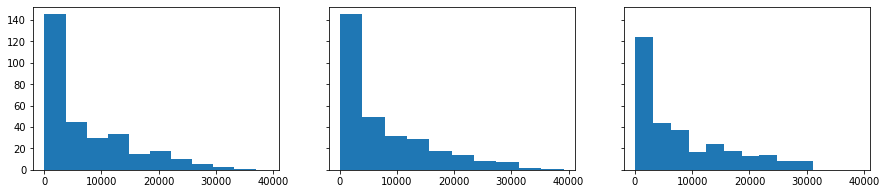

In [23]:
fig,ax = plt.subplots(1,3, figsize = (15, 3), sharex= True, sharey= True)
for i,r in enumerate(ringdf.Replicate.unique()):
    plt.sca(ax[i])
    h = ringdf[(ringdf.Replicate == r)].Melanin.values
    plt.hist(h)

plt.sca(ax[-1])

m = ringdf.groupby("Sample").agg(np.mean).Melanin.values

plt.hist(m);

In [ ]:
## Plot segregants
fig,ax = plt.subplots(1,3,figsize=(10,4),sharey=True)
for i,r in enumerate(ringdf.Replicate.unique()):
    
    plt.sca(ax[i])
    Halo_sorted = ringdf[(ringdf.Replicate == r)].sort_values('Melanin').reset_index(drop=True)
    
#    h = Halo_sorted[(Halo_sorted.Replicate == r)].Melanin.values
    
    plt.plot(Halo_sorted.index,
        Halo_sorted.Melanin.values,
         'k.',alpha=0.25,label='F$_{1}$');


plt.xlabel('Strain',fontsize=14);
plt.xticks(fontsize=14)
#plt.ylabel(myylabel,
#           fontsize=14)
plt.legend(fontsize=14);
plt.subplots_adjust(wspace=0.058)
